     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 10.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 110.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 110.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 83.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 4.4 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=23a795f2105ec19e8345bc1c6642f90357b74b60a4ac5feb20fc1d796e3fb937
  Stored in directory: /root/.cache/pip/wheels/06/3e/78/fa1588c1ae991bbfd814af2bcac6cef7a178beee1939180d46
Successfully built pylatexenc
✅ Environment Ready.


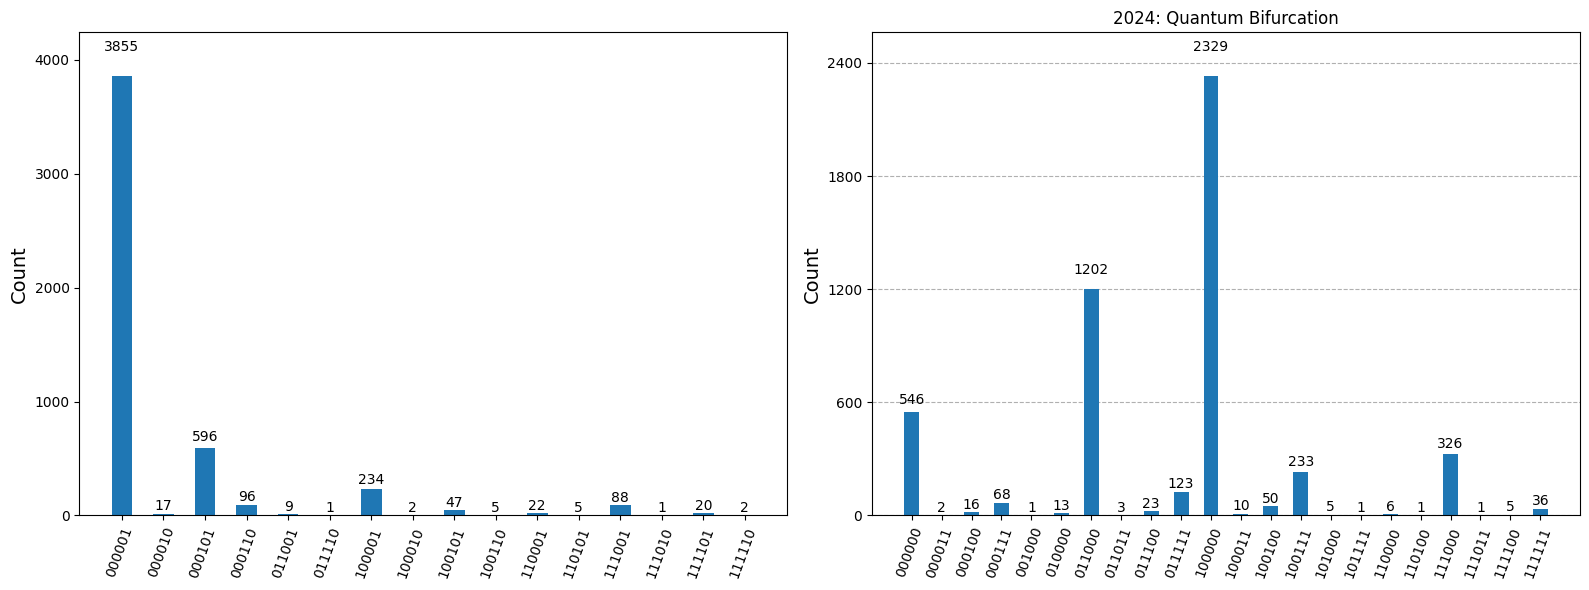

In [3]:
# %% [markdown]
# # Project IQD: Social Phase Transition Simulation
# **Author:** Dr. Ham-Jung (Alaric) Kuo, A&J Consulting
#
# This notebook demonstrates the core algorithms behind the whitepaper **"The Topology of Hope"**.
# We utilize a 6-Qubit Quantum Circuit to model social dynamics under high-tension fields.

# %% [markdown]
# ## 1. Setup Environment

# %%
# Install necessary libraries if running in Colab

!pip install qiskit qiskit-aer pylatexenc matplotlib

import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

print("✅ Environment Ready.")

# %% [markdown]
# ## 2. Core Logic: The 6-Qubit Circuit
# Here we define the mapping from Tension Parameters to Quantum Gates.

# %%
def value_to_angle(val):
    """Maps a tension value (-1 to 1) to a rotation angle (pi to 0)."""
    return (1 - val) * (np.pi / 2)

def build_iqd_circuit(data_node):
    """Constructs the IQD Quantum Circuit based on tension nodes."""
    qc = QuantumCircuit(6)

    # --- Encoding (Tension Injection via Ry Gates) ---
    # US Chain (q0-q2)
    qc.ry(value_to_angle(data_node["US_Nation"]), 0)
    qc.ry(value_to_angle(data_node["US_Corp"]), 1)
    qc.ry(value_to_angle(data_node["US_Supply"]), 2)
    # CN Chain (q3-q5)
    qc.ry(value_to_angle(data_node["CN_Nation"]), 3)
    qc.ry(value_to_angle(data_node["CN_Corp"]), 4)
    qc.ry(value_to_angle(data_node["CN_Supply"]), 5)

    # --- Entanglement (Vertical & Horizontal) ---
    qc.cx(0, 1) # US Nation -> Corp
    qc.cx(1, 2) # US Corp -> Supply
    qc.cx(3, 4) # CN Nation -> Corp
    qc.cx(4, 5) # CN Corp -> Supply

    # Global Geopolitical Tension (Horizontal Link)
    qc.cz(0, 3)

    qc.measure_all()
    return qc

# %% [markdown]
# ## 3. Experiment: 2008 vs 2024 (Historical Backtest)
# Simulating the structural shift from "Deterministic Collapse" to "Bifurcation".

# %%
historical_data = [
    {
        "year": 2008,
        "label": "Financial Crisis (US Weak / CN Strong)",
        "nodes": {"US_Nation": -0.8, "US_Corp": -1.0, "US_Supply": 0.5,
                  "CN_Nation": 0.8,  "CN_Corp": 0.9,  "CN_Supply": 0.7}
    },
    {
        "year": 2024,
        "label": "AI Singularity (US Strong / CN Transition)",
        "nodes": {"US_Nation": 0.6,  "US_Corp": 1.0,  "US_Supply": 0.8,
                  "CN_Nation": 0.2,  "CN_Corp": 0.9,  "CN_Supply": -0.4}
    }
]

simulator = AerSimulator()
results = {}

for data in historical_data:
    qc = build_iqd_circuit(data["nodes"])
    job = simulator.run(transpile(qc, simulator), shots=5000)
    results[data["year"]] = job.result().get_counts()

# Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
plot_histogram(results[2008], ax=ax1, title="2008: Deterministic Collapse")
plot_histogram(results[2024], ax=ax2, title="2024: Quantum Bifurcation")
plt.tight_layout()
plt.show()

# %% [markdown]
# ## 4. Conclusion
# * **2008**: Shows a high probability of a single dominant state (Crisis Coherence).
# * **2024**: Shows a split in probability distribution, indicating a decoupled reality.